# overview of campaign deployments

In [1]:
import os

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# cognac data and tools
#import cognac.insitu as iu
import pynsitu as pyn

In [2]:
# select campaign

campaign = 'taos0'

cp = pyn.events.campaign(campaign)

TypeError: load() missing 1 required positional argument: 'Loader'

In [3]:
gps = cp.load('gps')
iridium = cp.load('iridium')
ship = cp.load('ship')
#emission = cp.load('log')
iridium = cp.load('iridium')

In [4]:
# ! tmp: waiting for cleaning up of gps data
#gps['recepteur1'] = {d: g.resample('1T', interpolate=True) for d, g in iridium['recepteur1'].items()}

---
### time line

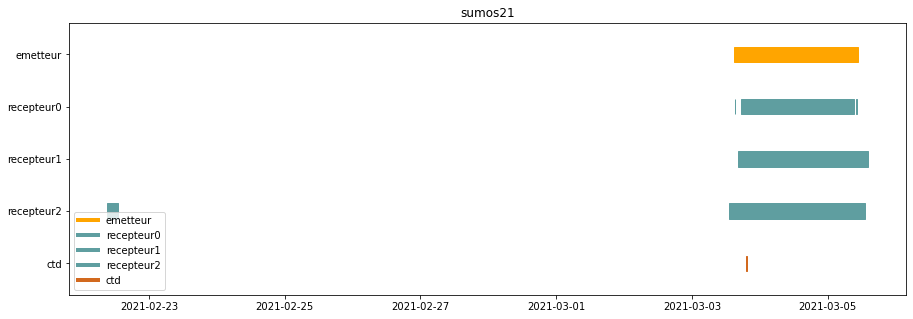

In [5]:
cp.timeline()

In [6]:
cp['recepteur2']

cognac.insitu.events.unit(recepteur2
d0 / start 2021-02-22 09:09:00 -5.99 46.27 / end 2021-02-22 13:13:00 -5.97 46.27
d1 / start 2021-03-03 13:13:00 -6.76 46.27 / end 2021-03-05 13:13:00 -6.93 46.07)

In [7]:
if cp.name=="cognac20":
    # get position from ship a posteriori, useful for synchro
    for t in [cp['recepteur0']['j2_synchro'].start.time, 
              cp['recepteur0']['j2_synchro'].end.time
             ]:
        lon, lat = ship.loc[t][['lon', 'lat']]
        print(str(t)+' : '+iu.utils.print_degmin(lat)+' / '+iu.utils.print_degmin(lon))

---

### maps

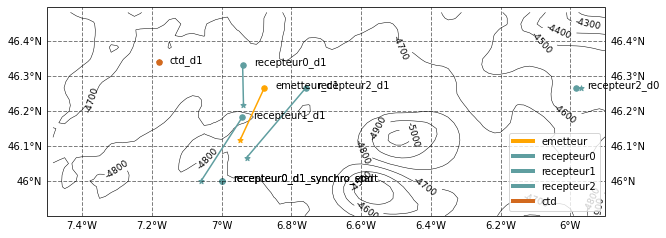

In [8]:
fac = cp.plot_map()

for uname, unit in cp.items():
    if uname=="ship":
        continue
    for d in unit:
        if unit=='ctd':
            line=False
        else:
            line=True
        if unit=='source':
            yshift=2
        else:
            yshift=0.
        if d.label!='j0':
            d.plot_on_map(fac[1], line=line, label=uname+'_'+d.label, color=unit['color'], 
                     yshift=yshift)

cp.add_legend(fac[1], loc=4)


In [9]:
# store bathymetric contours prior to folium plots
# iu.store_bathy_contours(cp.pathp+'contours')

In [10]:
#cp.map(overwrite_contours=True)
cp.map(zoom=10)

---

## movie


In [11]:
def make_movie(cp, tstart, tend, gps, ship, bounds=None):
    """ Make a movie
    """
    
    from tqdm import tqdm
    
    t_range = pd.date_range(tstart, tend, freq='10T')
    del_t = pd.Timedelta('1H')

    plt.switch_backend('agg')

    fig_dir = os.path.join(cp.pathp, 'figs/')

    i=0
    for t in tqdm(t_range):

        fac = cp.plot_map(figsize=(10,10),
                          bounds=bounds,
                         )
        fig, ax, crs = fac

        # gps
        if gps is not None:
            for unit, deployments in gps.items():
                for d, g in deployments.items():
                    if t>=g.d.index[0] and t<g.d.index[-1]+del_t:
                        (g.trim(t-del_t, t, inplace=False)
                          .plot(fac, 
                                label=unit, 
                                color=cp[unit]['color'],
                                lw=4,
                                start_marker=None,
                                end_marker='o',
                               )
                        )

        # ship
        if ship is not None:
            _s = ship.loc[t-del_t:t]
            ax.plot(_s['lon'], _s['lat'], lw=3, color='0.5')

        if 'mvp' in cp:
            for d in cp['mvp']:
                if t>=d.start.time and t<d.end.time+del_t:
                    t_min = max(t-del_t, d.start.time)
                    t_max = min(t, d.end.time)
                    _s = ship.loc[t_min:t_max]
                    ax.plot(_s['lon'], _s['lat'], lw=3, color=cp['mvp']['color'])

        cp.add_legend(fac[1], loc=4)
        #iu.utils.plot_bathy(fac)

        ax.set_title(campaign.split('.')[0]+'  '+str(t))

        figname = fig_dir+'fig_t%05d' %(i)+'.png'
        _ = fig.savefig(figname, dpi=150, facecolor='w', bbox_inches = 'tight')

        _ = fig.clf()

        i+=1


In [13]:

### cognac 20

# j1
#tstart = '2020-23-11 8:40:00'
#tend = '2020-11-24 9:00:00'
#bounds = [7.05, 7.35, 43.2, 43.45]
# i2mv: 1370 x 1050

# j2
#tstart = '2020-11-24 10:30:00'
#tend = '2020-11-25 10:00:00'
#bounds = [7., 7.3, 43.2, 43.4]
# i2mv: 1400 x 860

### sumos
# j1
tstart = '2021-03-03 14:00:00'
#tend = '2021-03-03 17:00:00'
tend = '2021-03-05 15:00:00'
bounds = [-7.2, -6.4, 45.9, 46.5]

#pd.date_range(tstart, tend, freq='10T')

make_movie(cp, tstart, tend, gps, ship, bounds=bounds)

100%|██████████| 295/295 [02:26<00:00,  2.01it/s]


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

---
### lops track utils

In [8]:
def convert_lopstrack(lat,lon):
    lon = insi.utils.ll_degmin(float(lon))
    lat = insi.utils.ll_degmin(float(lat))
    print(lat, lon)

convert_lopstrack(43.2649,7.0665)
convert_lopstrack(43.2707,7.1618)
convert_lopstrack(43.2932,7.127)
convert_lopstrack(43.3049,7.1083)

def load_iridium(self, item):
    imei = self[item]['iridium']
    dummy_path = 'home1/triagoz/intranet/htdocs/LOPStrack/DATA/'
    imei_file = cp.path+'iridium/'+dummy_path+'{}/synthese_{}.txt'.format(imei, imei)
    df = pd.read_csv(imei_file,
                    sep='\t+',
                    parse_dates=[0],
                    infer_datetime_format=True,
                    index_col=False,
                    names=['time','lat','lon','latlon0']
                     )
    df = df.set_index('time').sort_index()
    return df

df = load_iridium(cp,'enregistreur0')
df.iloc[-1]

lat                          43.2156
lon                          7.02835
latlon0    N43°12'56.07" E7°1'42.07"
Name: 2020-11-25 07:00:33, dtype: object

In [9]:
for item in ['source', 'enregistreur0','enregistreur1','enregistreur2']:
    print(item+' - {} :'.format(cp[item]['iridium']))
    df = load_iridium(cp,item)
    convert_lopstrack(*df.iloc[-1][['lat','lon']])

source - 300434063363300 :
(43, 16.187519999999722) (7, 5.977140000000034)
enregistreur0 - 300434063162020 :
(43, 12.934439999999796) (7, 1.7011200000000493)
enregistreur1 - 300434062298540 :
(43, 14.643299999999755) (7, 7.774079999999941)
enregistreur2 - 300434063369340 :
(43, 16.66218000000015) (7, 4.925040000000003)


---

### acoustic recorder / emetteur trajectories

In [6]:
# load processed data
emetteur = {s.label: iu.source.source_rtsys(file=cp.pathp+'source_log_'+s.label+'.p') 
                        for s in cp['emetteur']
         }

arecorder = {s.label: iu.gps.gps(file=cp.pathp+'arecorder_gps_'+s.label+'.p') 
                         for s in cp['arecorder']
            } 

In [7]:
arecorder['d0'].plot_bk(unit=cp['arecorder'])

Loading BokehJS ...

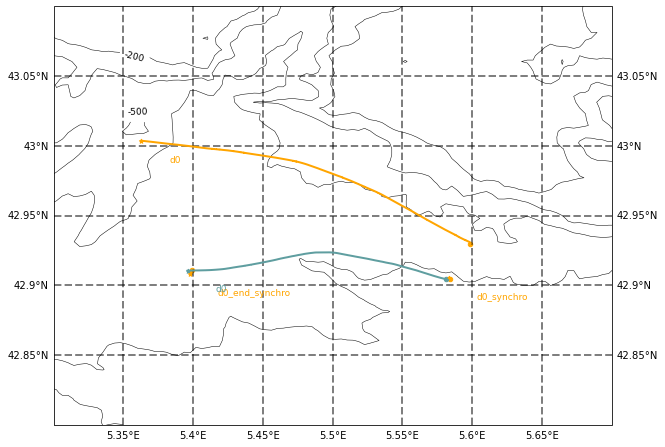

In [8]:
ll_lim = cp.lon_lim+cp.lat_lim
ll_lim = [l+o for l, o in zip(ll_lim, [.1,-.2,.0,.0])]

fac = insi.utils.plot_map(cp=cp, ll_lim=ll_lim)
insi.utils.plot_bathy(fac)

for label, lsource in source.items():
    lsource.gps.plot(fac, label=label, color=cp['source']['color'])

for label, lgps in arecorder.items():
    lgps.plot(fac, label=label, color=cp['arecorder']['color'])

In [9]:
# with folium
m = cp.map(ignore_labels=['arecorder','source'])
m = arecorder['d0'].plot_folium(m, color=cp['arecorder']['color'])
m = source['d0'].gps.plot_folium(m, color=cp['source']['color'])
m

--- 
### separation, velocities

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x144a0ca60>,
      dtype=object)

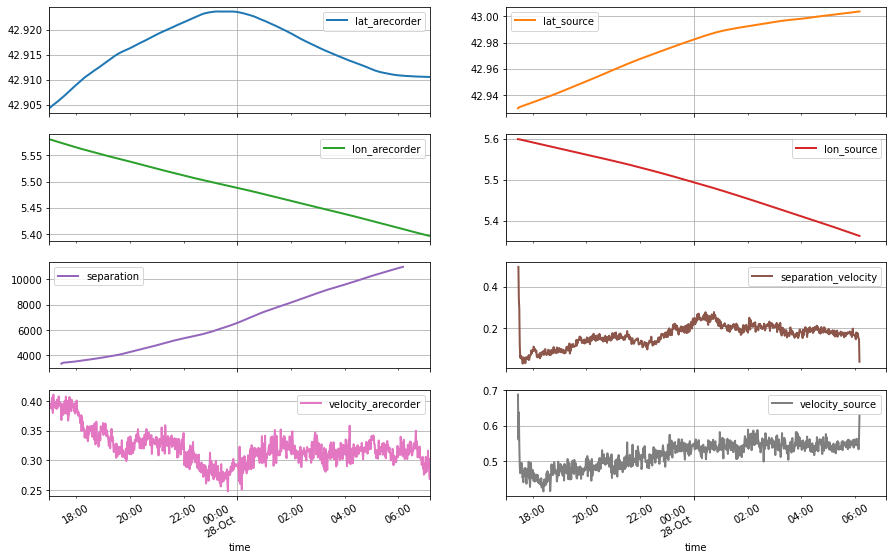

In [10]:
gps = arecorder['d0'].join(source['d0'].gps, rule='1T')
gps = gps.reindex(sorted(gps.columns), axis=1)
gps.plot(lw=2, subplots=True, grid=True, layout=(4,2), figsize=(15,10))


---

### folium tests

In [ ]:
import folium
from matplotlib.colors import cnames
from folium.plugins import MeasureControl, MousePosition

In [ ]:
folium.GeoJson?

In [ ]:
folium.features.GeoJsonPopup?

In [ ]:
tiles='Stamen Terrain'
tiles='Cartodb Positron'

m = folium.Map(location=[cp.lat_mid, cp.lon_mid],
               width='80%',
               height='80%',
               zoom_start=11,
               tiles=tiles,
               titles='my title', 
               attr="attribution",
              )

contours_geojson = insi.utils.load_bathy_contours()
tooltip = folium.GeoJsonTooltip(fields=['title'], aliases=['depth'], localize=True)
popup = folium.GeoJsonPopup(fields=['title'], aliases=['depth'], localize=False)

#folium.Popup(
def style_func(feature):
    return {'color':   feature['properties']['stroke'], #colorscale(feature['properties']['level-value']),
            'weight':  3, #x['properties']['stroke-width'],
            #'fillColor': x['properties']['fill'],
            'opacity': 1.,
            #'popup': 'depth '+feature['properties']['title'],
           }

folium.GeoJson(
    contours_geojson,
    name='geojson',
    style_function=style_func,
    tooltip=tooltip,
    popup=popup,
).add_to(m)

for uname, u in cp.items():
    for d in u:
        folium.Polygon([(d.start.lat, d.start.lon), (d.end.lat, d.end.lon)],
                       tooltip=uname+' '+d.label+'<br>'+str(d.start.time)+'<br>'+str(d.end.time),
                       color=cnames[u['color']],
                       dash_array='10 20',
                       opacity=.5
                      ).add_to(m)
        folium.Circle((d.start.lat, d.start.lon),
                      tooltip=uname+' '+d.label+'<br>'+str(d.start.time),
                      radius=2*1e2,
                      color=cnames[u['color']],
                     ).add_to(m)
        folium.Circle((d.end.lat, d.end.lon),
                      tooltip=uname+' '+d.label+'<br>'+str(d.end.time),
                      radius=1e2,
                      color=cnames[u['color']],
                     ).add_to(m)

MeasureControl().add_to(m)
MousePosition().add_to(m)

folium.features.DivIcon

m

In [ ]:
folium.plugins.FloatImage?

In [ ]:
folium.features.DivIcon?